The following toy example is based on the TensorFlow tutorial: https://www.tensorflow.org/quantum/tutorials/mnist

This tutorial builds a **quantum neural network (QNN)** to **classify a simplified version of MNIST**, similar to the approach used in Farhi et al. (https://arxiv.org/pdf/1802.06002.pdf). The performance of the quantum neural network on this classical data problem is compared with a classical neural network.

In [21]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

import collections

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('MNIST Dataset Shape:')
print('x_train: ' + str(x_train.shape) + ', y_train: ' + str(y_train.shape) + ', x_test: ' + str(x_test.shape) + ', y_test: ' + str(y_test.shape))
print('Number of training examples: ', len(x_train))
print('Number of test examples: ', len(x_test))

MNIST Dataset Shape:
x_train: (60000, 28, 28), y_train: (60000,), x_test: (10000, 28, 28), y_test: (10000,)
Number of training examples:  60000
Number of test examples:  10000


Filter the dataset to keep just the 3s and 6s, remove the other classes. At the same time convert the label, y, to boolean: True for 3 and False for 6.

In [5]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x, y

In [6]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


Show the first example:

True


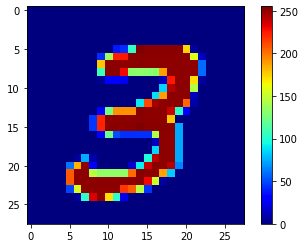

In [7]:
print(y_train[0])

plt.imshow(x_train[0, :, :], cmap='jet')
plt.colorbar()

28x28 is too large => resize the image down to 4x4.

In [8]:
x_train_small = tf.image.resize(tf.transpose(x_train), [4,4])
x_train_small = tf.transpose(x_train_small)
x_test_small = tf.image.resize(tf.transpose(x_test), (4,4)).numpy()
x_test_small = tf.transpose(x_test_small)

x_train_small shape:  (12049, 4, 4)
x_test_small shape: (1968, 4, 4)
True


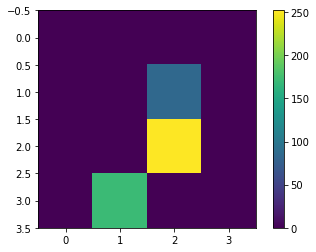

In [9]:
print('x_train_small shape: ', x_train_small.shape)
print('x_test_small shape:', x_test_small.shape)
print(y_train[0])

plt.imshow(x_train_small[0,:,:])
plt.colorbar()

Remove contradictory examples

---


From Farhi et al., filter the dataset to remove images that are labeled as belonging to both classes.

In [19]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)
    orig_x = {}
    # Determine the set of labels for each unique image:
    for x, y in zip(xs,ys):
       orig_x[tuple(x.numpy().flatten())] = x
       mapping[tuple(x.numpy().flatten())].add(y)

    new_x = []
    new_y = []
    for flatten_x in mapping:
      x = orig_x[flatten_x]
      labels = mapping[flatten_x]
      if len(labels) == 1:
          new_x.append(x)
          new_y.append(next(iter(labels)))
      else:
          # Throw out images that match more than one label.
          pass

    num_uniq_3 = sum(1 for value in mapping.values() if len(value) == 1 and True in value)
    num_uniq_6 = sum(1 for value in mapping.values() if len(value) == 1 and False in value)
    num_uniq_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images:", len(mapping.values()))
    print("Number of unique 3s: ", num_uniq_3)
    print("Number of unique 6s: ", num_uniq_6)
    print("Number of unique contradicting labels (both 3 and 6): ", num_uniq_both)
    print()
    print("Initial number of images: ", len(xs))
    print("Remaining non-contradicting unique images: ", len(new_x))

    return np.array(new_x), np.array(new_y)

In [22]:
x_train_nocon, y_train_nocon = remove_contradicting(x_train_small, y_train)

Number of unique images: 10387
Number of unique 3s:  4912
Number of unique 6s:  5426
Number of unique contradicting labels (both 3 and 6):  49

Initial number of images:  12049
Remaining non-contradicting unique images:  10338
